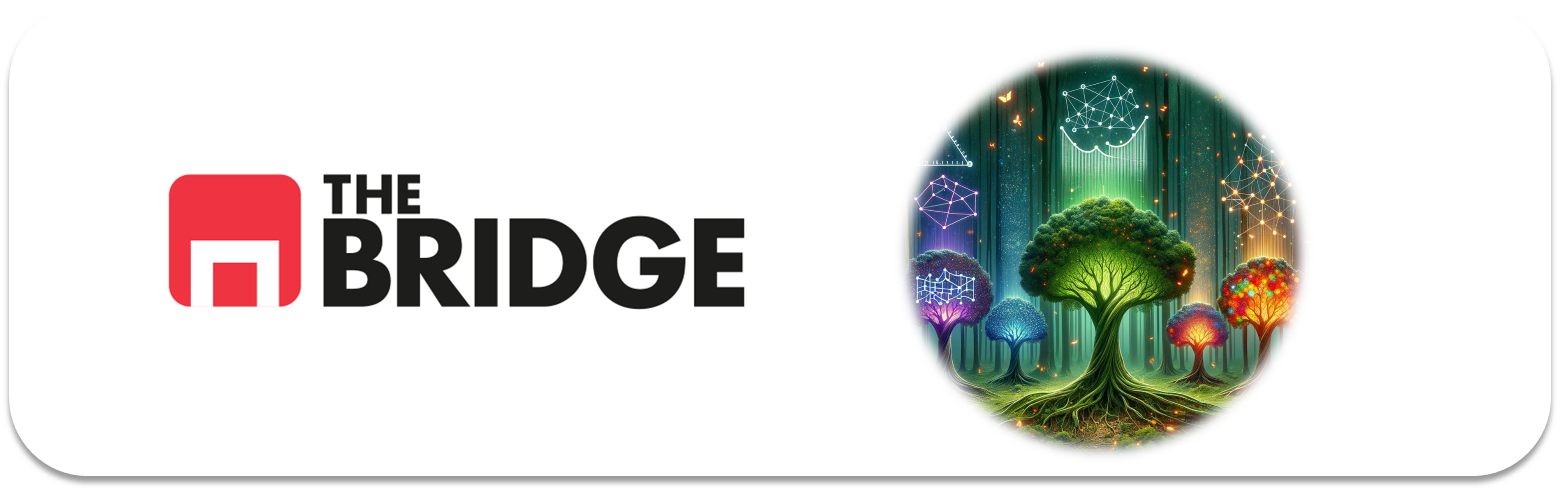

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import bootcampviztools  as bt

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [ ]:
### Otra forma
## pd.read_csv(url, header=none, names=names)

In [51]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df = pd.read_csv(url)

df.head(5)

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [52]:
df.columns=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [53]:
df.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
df.nunique()

preg      17
plas     136
pres      47
skin      51
test     186
mass     248
pedi     516
age       52
class      2
dtype: int64

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

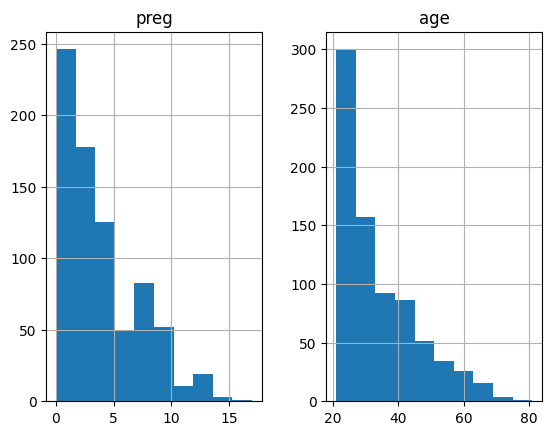

In [56]:
df[["preg","age"]].hist()

In [57]:
df.preg.value_counts(normalize=True)

preg
1     0.176010
0     0.144720
2     0.134289
3     0.097784
4     0.088657
5     0.074316
6     0.063885
7     0.058670
8     0.049544
9     0.036506
10    0.031291
11    0.014342
13    0.013038
12    0.011734
14    0.002608
17    0.001304
15    0.001304
Name: proportion, dtype: float64

In [8]:
target= "class"

In [9]:
df[target].value_counts(normalize= True)

class
0    0.65189
1    0.34811
Name: proportion, dtype: float64

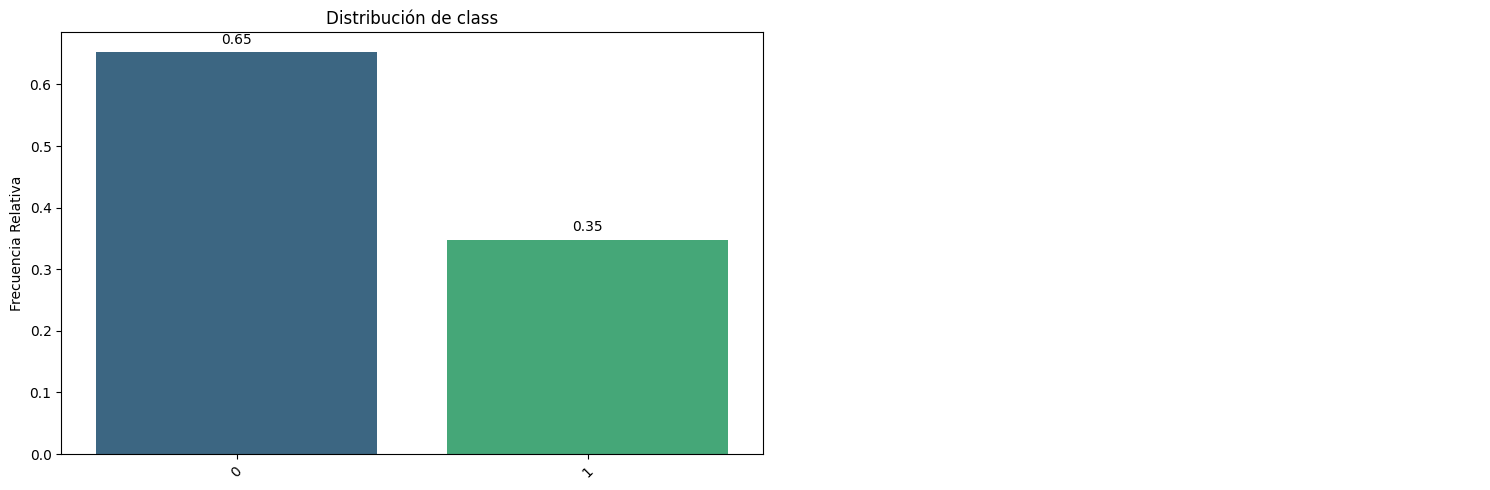

In [65]:
bt.pinta_distribucion_categoricas(df, [target], mostrar_valores=True,relativa=True)

In [66]:
features = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

### No se escala por que no usaremos regresion, solo arboles

In [ ]:
##scaler = StandardScaler()
##df[features] = scaler.fit_transform(df[features])

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [72]:
X = df[features]
y = df[target]

In [73]:
train_set, test_set = train_test_split(df, test_size= 0.2,stratify=df["class"], random_state= 42)

In [116]:
tienen_nulos= ["plas","pres","skin","test","mass"]

In [ ]:
train_set[tienen_nulos] = train_set[tienen_nulos].replace(0, np.nan)

In [118]:
test_set[tienen_nulos] = test_set[tienen_nulos].replace(0, np.nan)

In [119]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="median")

train_set[tienen_nulos]= imp.fit_transform(train_set[tienen_nulos])
test_set[tienen_nulos]= imp.fit_transform(test_set[tienen_nulos])

In [125]:
train_set[tienen_nulos].isna().sum()

plas    0
pres    0
skin    0
test    0
mass    0
dtype: int64

### Analisis con target (Mini EDA)

#### Verla como numerica

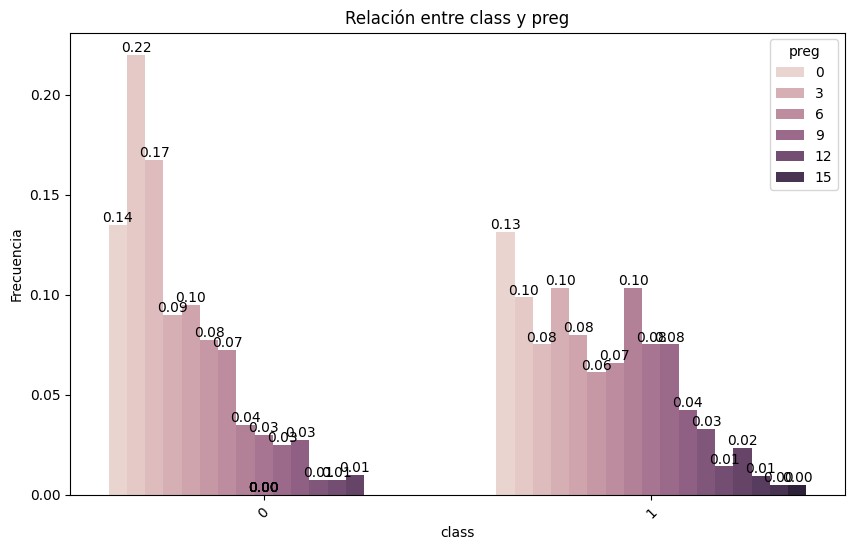

In [126]:
bt.plot_categorical_relationship_fin(train_set,target,"preg",relative_freq=True,show_values=True)

#### Verla como categorica

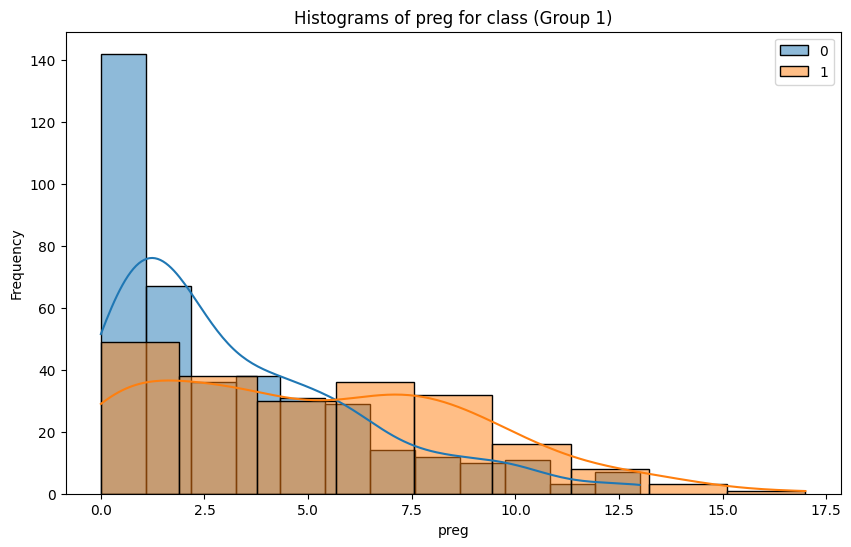

In [127]:
bt.plot_grouped_histograms(train_set,cat_col=target,num_col="preg",group_size=3)

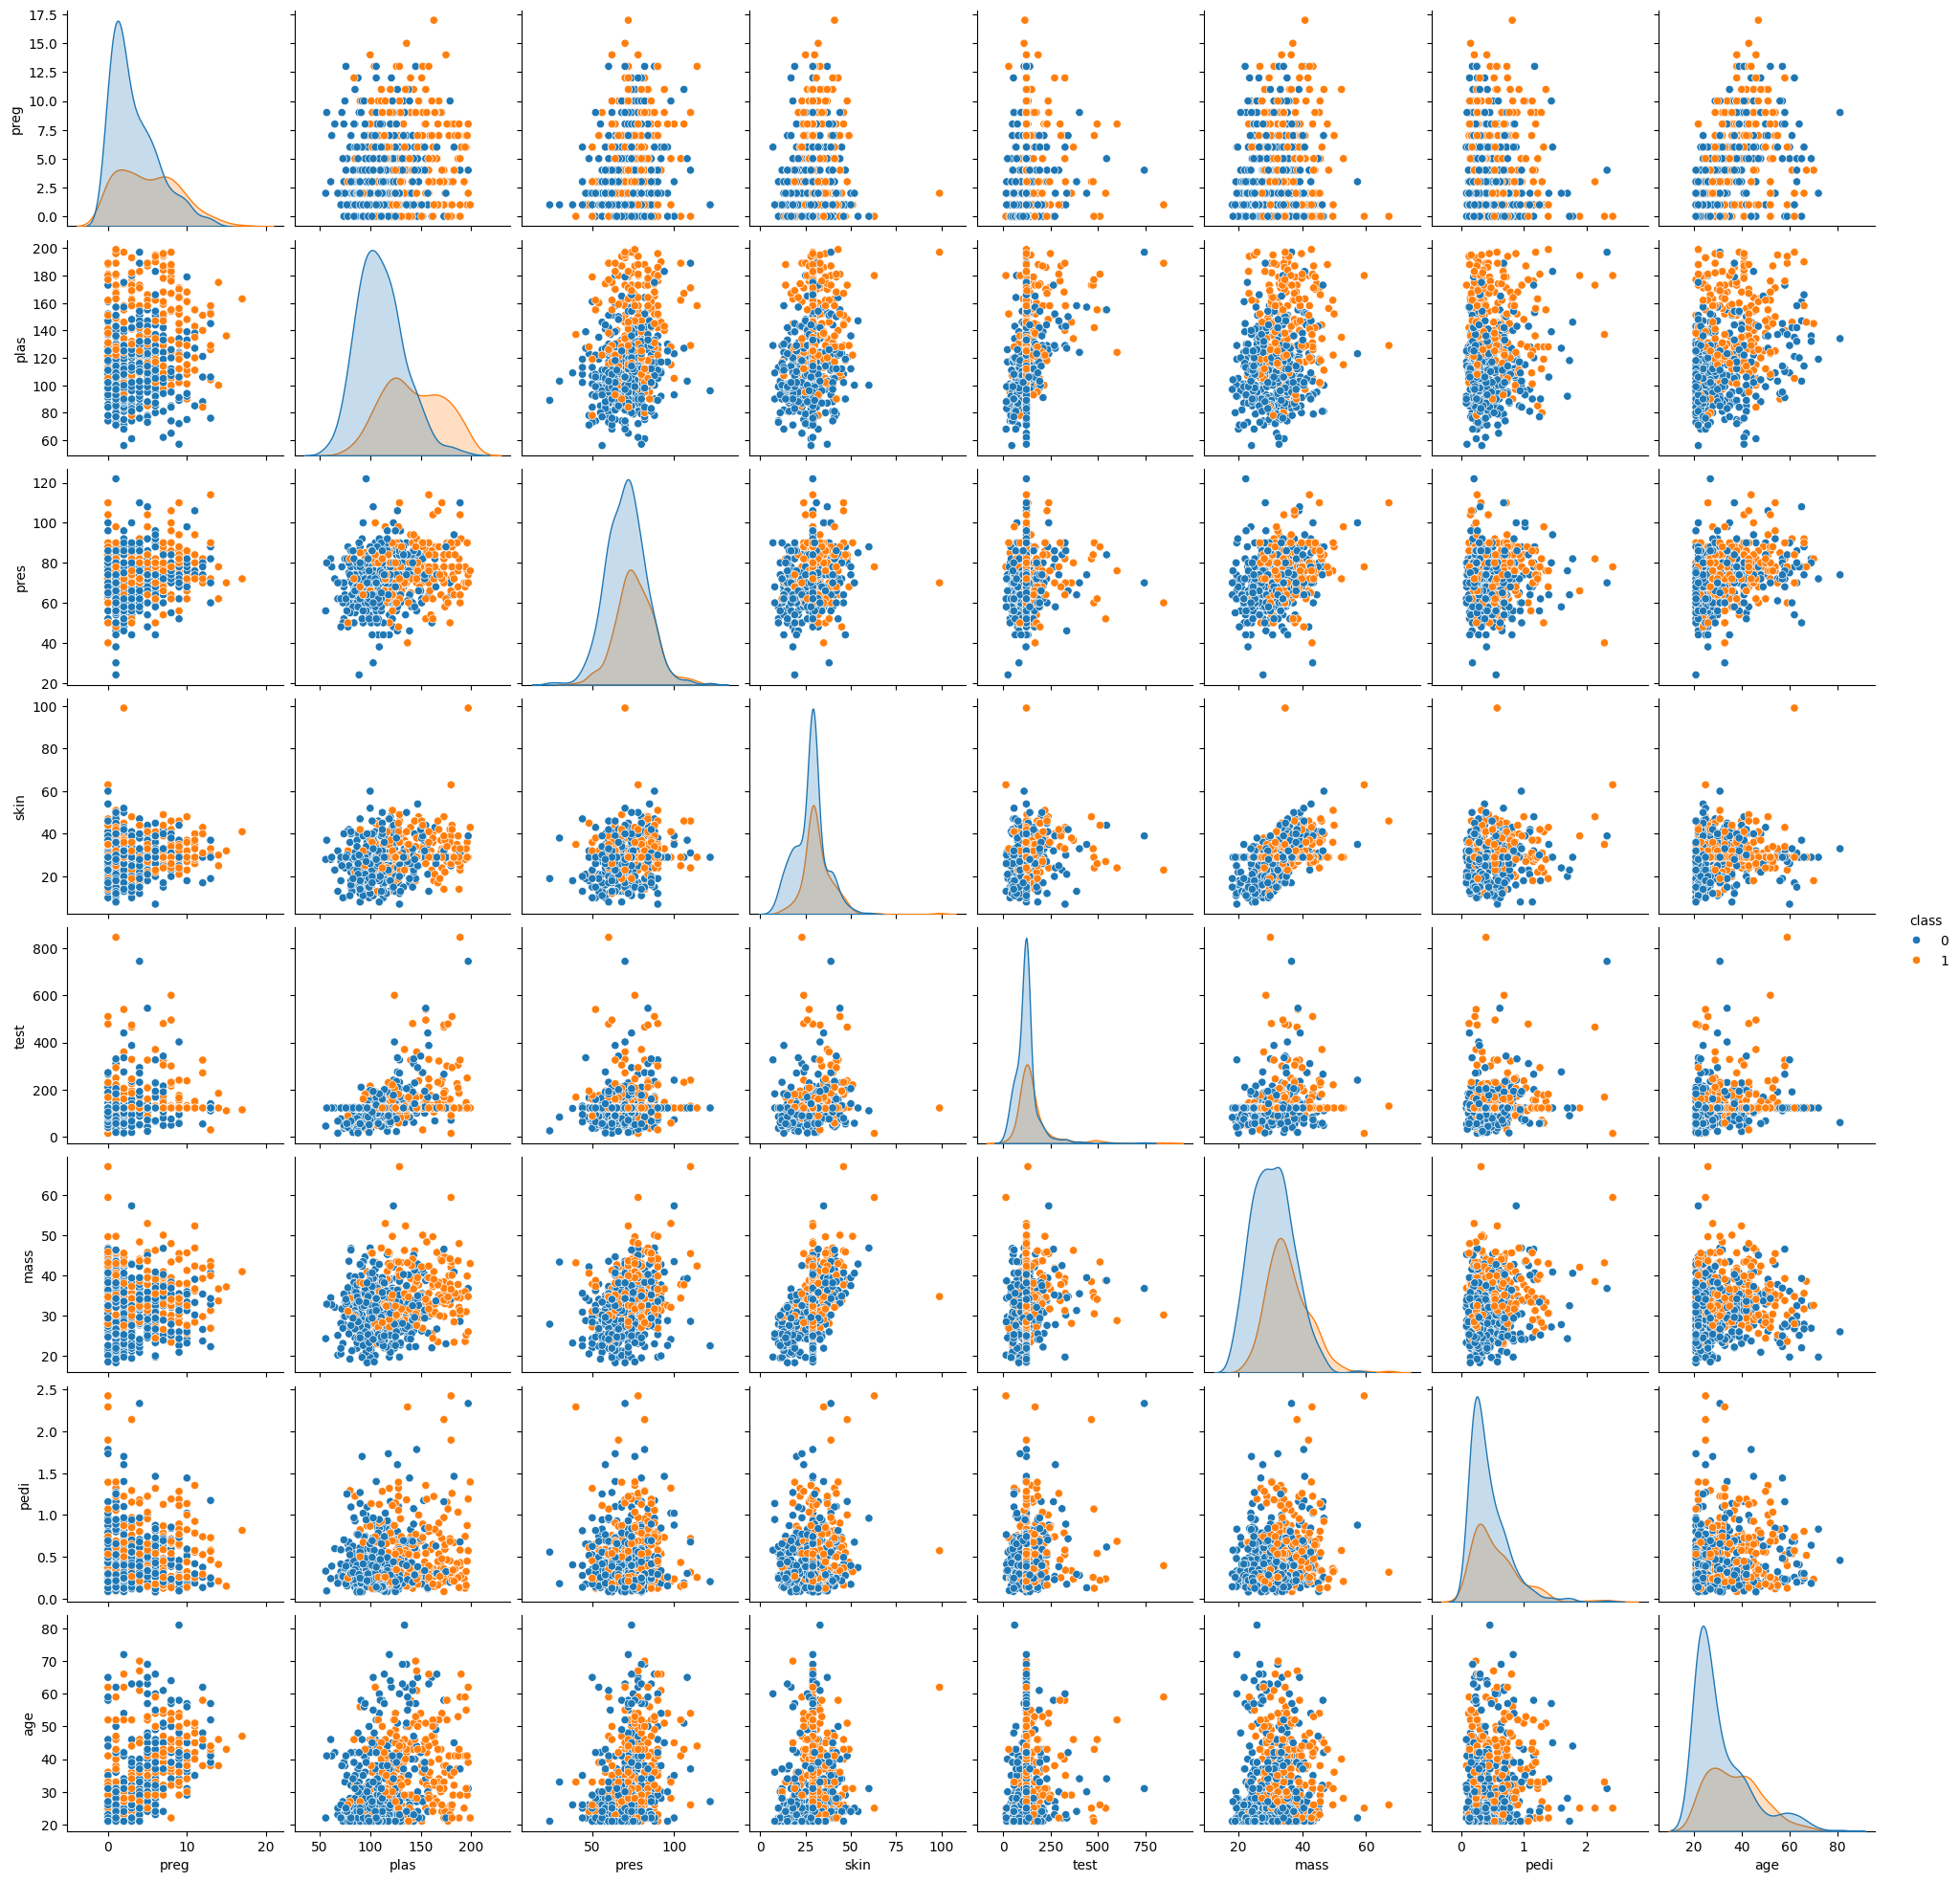

In [122]:
sns.pairplot(train_set,hue=target)

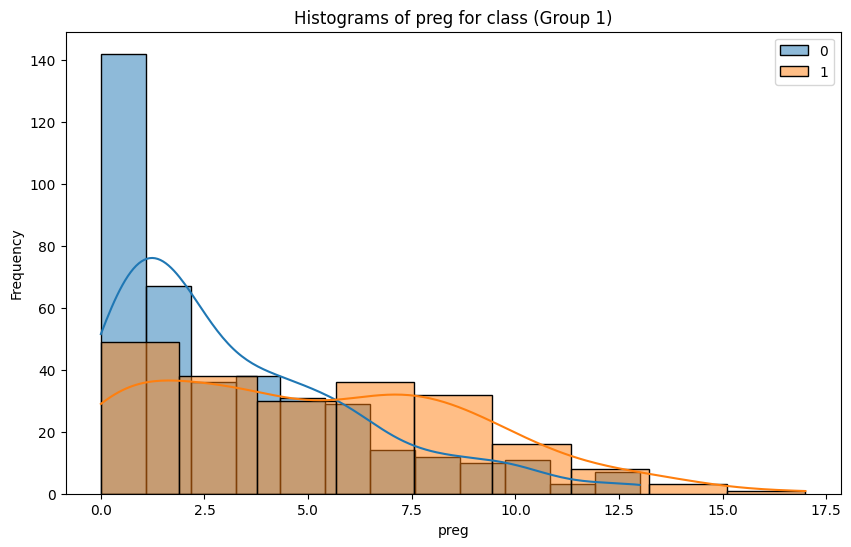

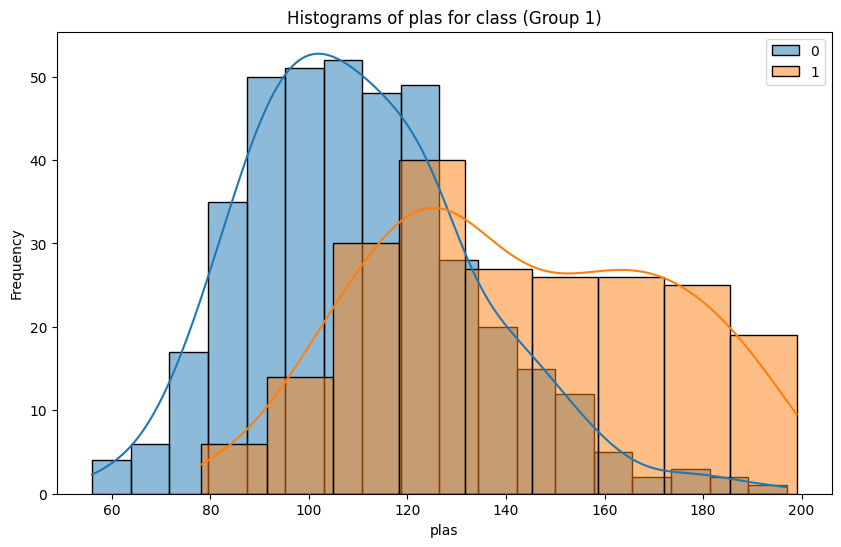

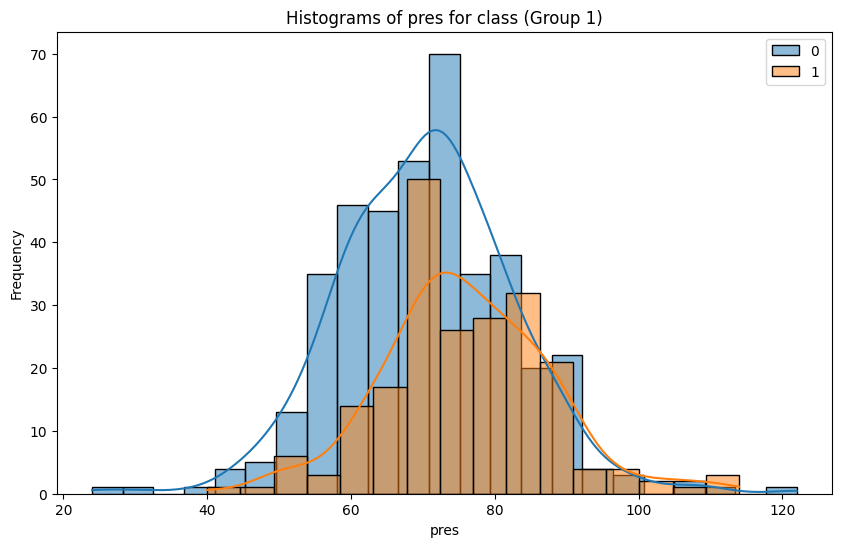

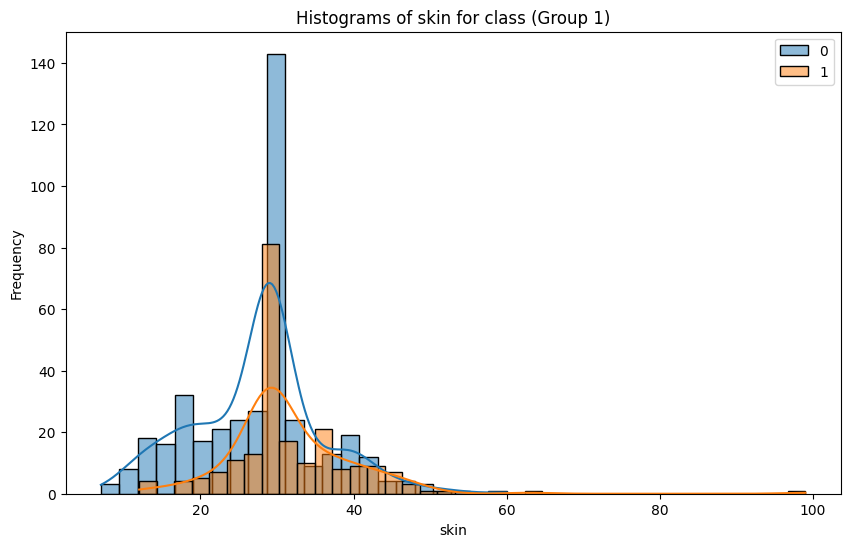

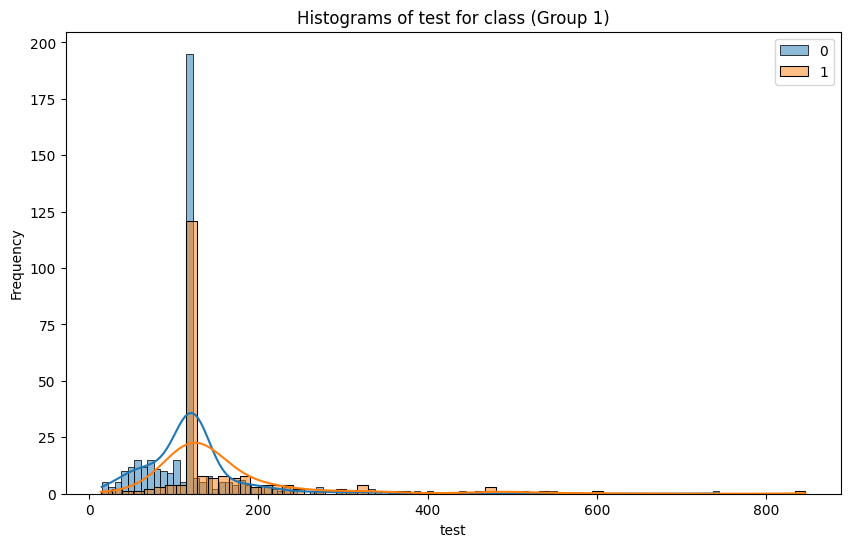

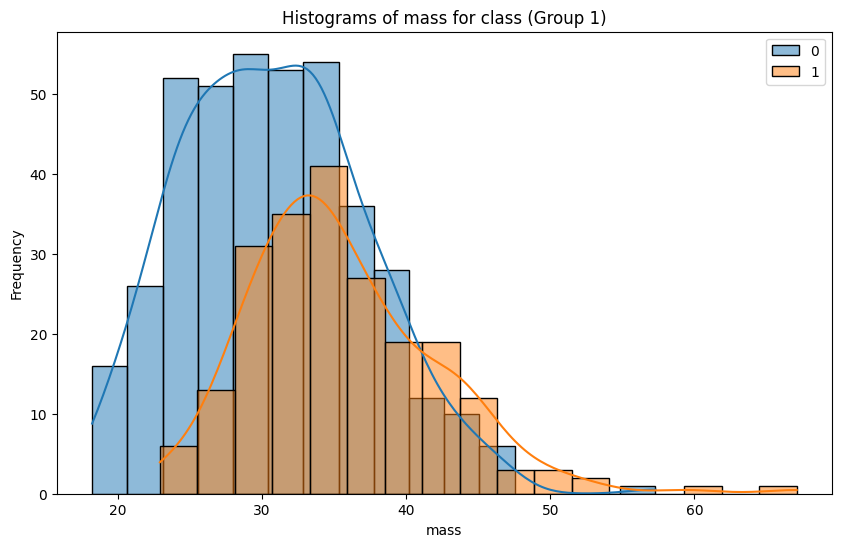

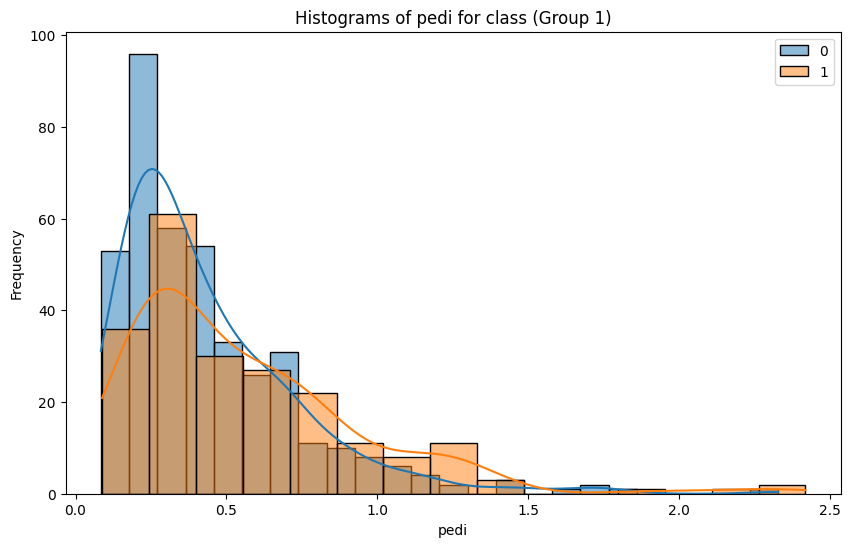

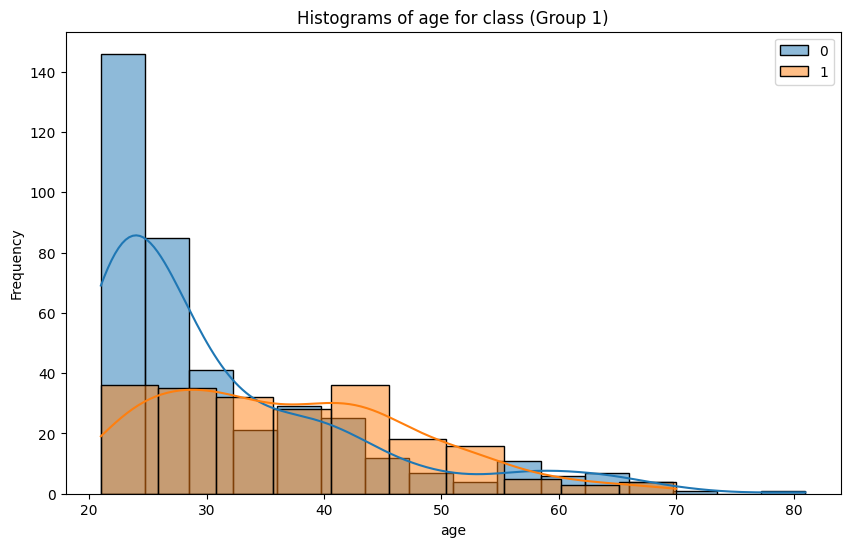

In [128]:
for col in features:
    bt.plot_grouped_histograms (train_set,cat_col=target,num_col=col,group_size=3)

In [129]:
X_train= train_set.drop("class", axis=1)
y_train= train_set["class"]
X_test= test_set.drop("class", axis=1)
y_test= test_set["class"]

In [130]:
X_train

,preg,plas,pres,skin,test,mass,pedi,age
247,9,124.0,70.0,33.0,402.0,35.4,0.282,34
369,3,173.0,82.0,48.0,465.0,38.4,2.137,25
643,3,103.0,72.0,30.0,152.0,27.6,0.730,27
465,0,74.0,52.0,10.0,36.0,27.8,0.269,22
691,2,121.0,70.0,32.0,95.0,39.1,0.886,23
...,...,...,...,...,...,...,...,...
682,4,125.0,80.0,29.0,122.0,32.3,0.536,27
112,4,76.0,62.0,29.0,122.0,34.0,0.391,25
555,1,97.0,70.0,40.0,122.0,38.1,0.218,30
603,4,183.0,72.0,29.0,122.0,28.4,0.212,36


## Obtener diferentes modelos a partir de tecnologías de bagging y boosting

In [131]:
from sklearn.model_selection import cross_val_score

In [132]:
from sklearn.ensemble import RandomForestClassifier # bagging - boostrap aggregation


rnd_clf = RandomForestClassifier(n_estimators=500,
                                max_depth=4,
                                random_state=42)

In [133]:
cross_val_score(rnd_clf,X_train,y_train,cv=5,scoring="balanced_accuracy")

array([0.75145349, 0.73531977, 0.68081395, 0.68303571, 0.70625   ])

In [134]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print("Recall medio:", np.mean(cross_val_score(rnd_clf,X_train,y_train,cv=5,scoring="balanced_accuracy")))

Recall medio: 0.7113745847176081


In [135]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=42)

In [136]:
y_pred_rf = rnd_clf.predict(X_train)

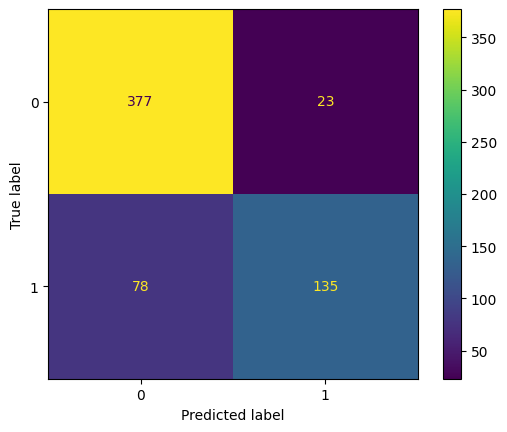

In [137]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_rf)

In [138]:
print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       400
           1       0.85      0.63      0.73       213

    accuracy                           0.84       613
   macro avg       0.84      0.79      0.80       613
weighted avg       0.84      0.84      0.83       613



#### El modelo tiene una precisión global (accuracy) del 8%, lo cual es aceptable, pero al analizar más a fondo.
#### El modelo no detecta bien los casos positivos (clase 1). Tiene un recall bajo (0.65), lo que significa que muchas personas con diabetes no están siendo identificadas.

In [139]:
rnd_clf.feature_importances_

array([0.08155166, 0.38508079, 0.03957913, 0.04715519, 0.08984601,
       0.16520868, 0.06657096, 0.12500758])

#### La variable plas (Concentración de Glucosa en Plasma) es la mas importante

In [21]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=200, random_state=42)

ada_clf.fit(X_train, y_train)



AdaBoostClassifier(n_estimators=200, random_state=42)

In [22]:
y_pred_ada = ada_clf.predict(X_train)
print(classification_report(y_train, y_pred_ada))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       400
           1       0.78      0.67      0.72       213

    accuracy                           0.82       613
   macro avg       0.81      0.78      0.79       613
weighted avg       0.81      0.82      0.81       613



In [140]:
from lightgbm import LGBMClassifier



In [141]:
xgb_clas = XGBClassifier(max_depth =5, random_state = 42)

lgbm_clas = LGBMClassifier(max_depth =5, random_state = 42,
                           verbose=-1, n_jobs=-1)

In [142]:
for nombre, modelo in zip(["Random Forest","Xgboost","LightGBM"],[rnd_clf, xgb_clas, lgbm_clas]):
    print(f"Para {nombre}:", end="")
    print(np.mean(cross_val_score(modelo,X_train,y_train,cv=5,scoring="balanced_accuracy")))

Para Random Forest:0.7113745847176081
Para Xgboost:0.6922245293466224
Para LightGBM:0.7131256921373199


In [143]:
lgbm_clas.fit(X_train, y_train)

LGBMClassifier(max_depth=5, n_jobs=-1, random_state=42, verbose=-1)

In [144]:
y_pred_lgbm = lgbm_clas.predict(X_train)
print(classification_report(y_train, y_pred_ada))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       400
           1       0.78      0.67      0.72       213

    accuracy                           0.82       613
   macro avg       0.81      0.78      0.79       613
weighted avg       0.81      0.82      0.81       613



In [145]:

xgb_clas.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [146]:
y_pred_xgb = xgb_clas.predict(X_train)
print(classification_report(y_train, y_pred_ada))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       400
           1       0.78      0.67      0.72       213

    accuracy                           0.82       613
   macro avg       0.81      0.78      0.79       613
weighted avg       0.81      0.82      0.81       613



#### Tras evaluar diversos modelos de clasificación (Random Forest, AdaBoost, LightGBM y XGBoost), se seleccionó Random Forest como el modelo más adecuado para esta tarea, Random Forest fue el modelo seleccionado por ofrecer la mejor combinación de precisión global, estabilidad del entrenamiento y un rendimiento competitivo en ambas clases, lo que lo convierte en una opción sólida y confiable para la tarea de clasificación planteada

### Optimizar sus hiperparametros

In [27]:
from sklearn.model_selection import GridSearchCV

In [40]:
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_1 = {
    "n_estimators": [100,200,400],
    "max_depth": [2,4,10],
    "min_samples_leaf": [10,20,40],
    "max_features": ["sqrt","log2",None],
    "max_samples": [0.3,0.6,1]
}

rf_grid = GridSearchCV(rf_clf,
                       param_grid=grid_1,
                       cv=5,
                       scoring="accuracy",
                       n_jobs=-1)

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [0.3, 0.6, 1],
                         'min_samples_leaf': [10, 20, 40],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

In [41]:
rf_grid.best_score_

np.float64(0.7716513394642144)

In [42]:
rf_grid.best_params_

{'max_depth': 4,
 'max_features': None,
 'max_samples': 0.3,
 'min_samples_leaf': 10,
 'n_estimators': 200}

In [43]:
y_pred_grid = rf_grid.predict(X_train)
print(classification_report(y_train, y_pred_grid))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       400
           1       0.71      0.77      0.74       213

    accuracy                           0.81       613
   macro avg       0.79      0.80      0.79       613
weighted avg       0.81      0.81      0.81       613



### Conclusion de cual modelo es mejor Random Forest basico o Random Forest con hiperparametros optimizados
* Si el problema da más importancia a la clase 1 (por ejemplo, detectar quien es mas propenso a tener diabetes), entonces el modelo con GridSearch es mejor, porque detecta más casos verdaderos (mayor recall y F1 en clase 1).

* Si se prefiere evitar falsos positivos y buscamos precisión alta, el modelo básico tiene mejor precisión en clase 1.

#### Comprobandolo con dataset test

In [46]:
y_pred_grid_2 = rf_grid.predict(X_test)
print(classification_report(y_test, y_pred_grid_2))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       100
           1       0.60      0.65      0.62        54

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

